# Dog Breed Recognition Project

## 1. Problem

Our goal is to identify dog breed from a photo of the dog.  
The machine learning problem is **supervised learning > multiclass classification**.  
Our task is to build a neural network image classifier using TensorFlow and TensorFlow Hub.

## 2. Evaluation

The evaluation metric set for the competition is Multiclass Log Loss.  
Our target matrix contains N Dogs x M Breeds, true breed = 1, rest = 0.  
Our model predicts a probability matrix with the same structure.  
Multiclass Log Loss measures the error of model predictions (the lower the better).  
Muticlass Log Loss is applied in image classification, natural language processing, and recommendation systems.

## 3. Data

Data is acquired from [Kaggle Dog Breed Identification Competition](https://www.kaggle.com/c/dog-breed-identification/data).

## 4. Features

#### Data Dictionary

* Our model analyzes images (unstructured data) > deep learning / transfer learning.
* There are 120 dog breeds in the training set > multiclass classification with 120 classes.
* There are 10 222 images in the training set.
* There are 10 357 images in the test set.

#### Importing the Tools

In [9]:
### importing tensorflow
import tensorflow
print(tensorflow.__version__)

### importing tensorflow hub
import tensorflow_hub as tfhub
print(tfhub.__version__)

### checking gpu availability
print(tensorflow.config.list_physical_devices())

### other imports
from pathlib import Path
from pandas import read_csv
from IPython.display import Image

2.15.0
0.16.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#### Uploading Data

In [ ]:
### unzipping project data
#!unzip "drive/MyDrive/Colab Data/dog-recognition.zip" -d "drive/MyDrive/Colab Data/"

#### Exploring Target Variable (Labels)

In [2]:
### importing labels
target_df = read_csv(filepath_or_buffer="drive/MyDrive/Colab Data/labels.csv")

In [3]:
### exploring labels
print(target_df.info())
print(target_df.describe())
target_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB
None
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

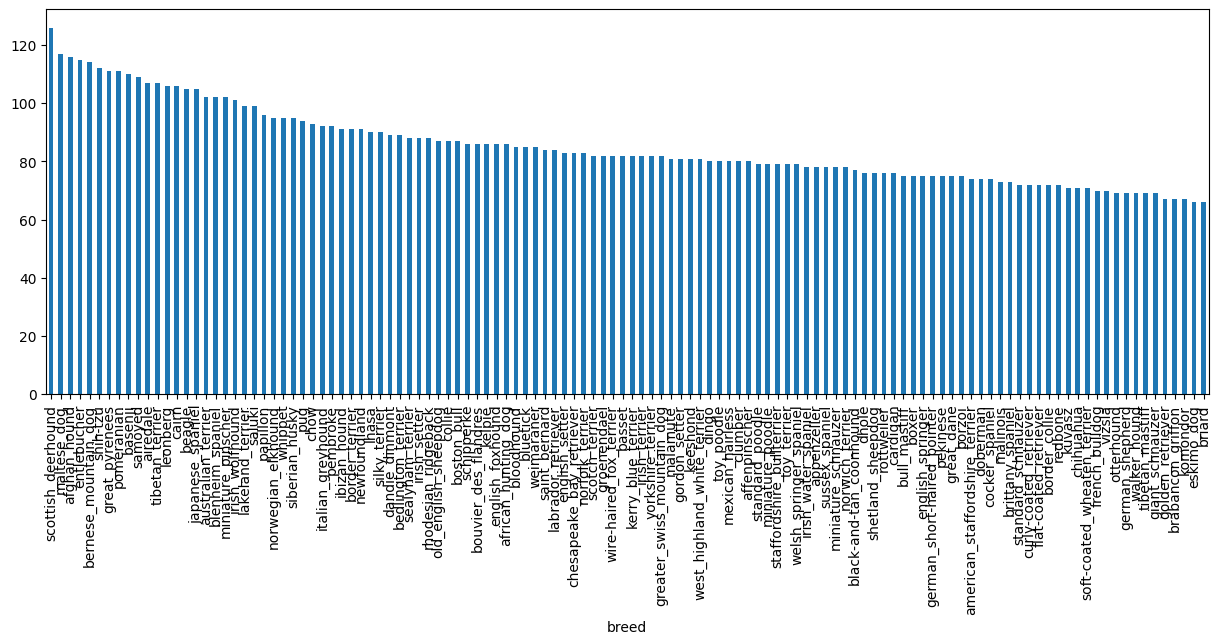

In [4]:
### counting and visualizing instances/breed
target_df["breed"].value_counts().plot.bar(figsize=(15,5))

In [5]:
### computing the median of instances/breed
target_df["breed"].value_counts().median()

82.0

Google recommends at least 10 images per class.  
We have adequate data with 82 images per class on average.

## 5. Modeling

#### Preparing Data

All machine learning algorithms require data in numerical format.  
So the first task is to turn training images into tensors.  
A tensor is a numerical matrix with n-dimensions, like a numpy ndarray.

In [8]:
### creating filepaths of images from image ids
target_df["filepath"] = "drive/MyDrive/Colab Data/train/" + target_df["id"] + ".jpg"
target_df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,drive/MyDrive/Colab Data/train/000bec180eb18c7...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,drive/MyDrive/Colab Data/train/001513dfcb2ffaf...
2,001cdf01b096e06d78e9e5112d419397,pekinese,drive/MyDrive/Colab Data/train/001cdf01b096e06...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,drive/MyDrive/Colab Data/train/00214f311d5d224...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,drive/MyDrive/Colab Data/train/0021f9ceb3235ef...


In [13]:
### matching number of filapaths to number of images
image_list = [image for image in Path("drive/MyDrive/Colab Data/train").iterdir()]
if target_df.index.size == len(image_list):
  print("Number of filepaths matches the number of images.")
else:
  print("Error: Number of filepaths does not match the number of images.")

Number of filepaths matches the number of images.


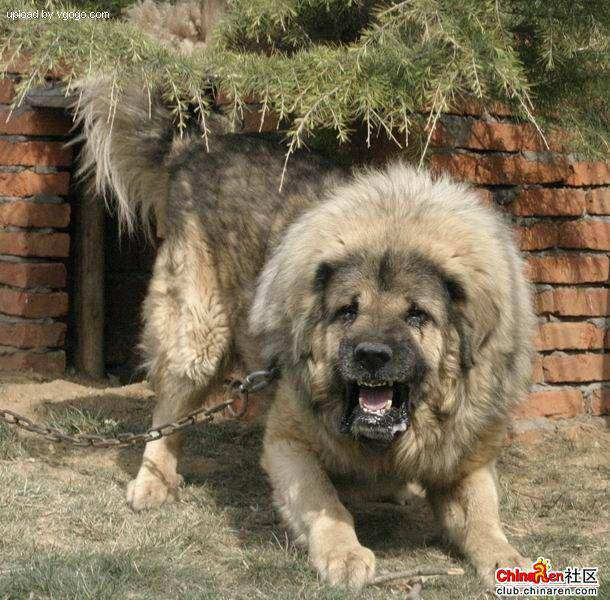

In [14]:
### checking validity of filepaths
Image(filename=target_df['filepath'][9000])

In [15]:
### checking the breed of the above beast
target_df["breed"][9000]

'tibetan_mastiff'